# Pandas

## What is pandas?

Pandas is an open-source python library that can be used to create and query small datasets. You can use it to load  .csv files to your jupyter notebook. To learn more about data structures in pandas see their <a href="https://pandas.pydata.org/pandas-docs/stable/dsintro.html">webpage</a>. In this lecture we will go through some of the useful functions of this library while looking at the <a href="https://www.kaggle.com/claudiodavi/superhero-set">heroes dataset</a> from Kaggle.

<span style="color:red">NOTE:</span> Before continuing, please download the dataset and add it to the folder where this notebook resides.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The command <code>read_csv()</code> loads a ".csv" file to jupyter notebook as an object of type <code>pandas.dataframe</code>.

In [2]:
df_heroes_info = pd.read_csv("./heroes/heroes_information.csv")
df_heroes_powers = pd.read_csv("./heroes/super_hero_powers.csv")

To take a peek at the dataframes we can use the method <code>head</code> which displays the top 5 entries.

In [3]:
df_heroes_info.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
df_heroes_powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Querying the dataset

To access a particular column of the dataframe we can use the access the elements like a python dictionary. The returned object is of the type panda.Series.

In [5]:
print(df_heroes_info['name'])
print(type(df_heroes_info['name']))

0               A-Bomb
1           Abe Sapien
2             Abin Sur
3          Abomination
4              Abraxas
            ...       
729    Yellowjacket II
730               Ymir
731               Yoda
732            Zatanna
733               Zoom
Name: name, Length: 734, dtype: object
<class 'pandas.core.series.Series'>


To see all the available possible powers recorded we can use the method <code>columns()</code> on the <code>df_heroes_powers</code> dataframe.  

In [6]:
list_powers = [power for power in df_heroes_powers.columns][1:]
for powers in list_powers: 
    print(powers)

Agility
Accelerated Healing
Lantern Power Ring
Dimensional Awareness
Cold Resistance
Durability
Stealth
Energy Absorption
Flight
Danger Sense
Underwater breathing
Marksmanship
Weapons Master
Power Augmentation
Animal Attributes
Longevity
Intelligence
Super Strength
Cryokinesis
Telepathy
Energy Armor
Energy Blasts
Duplication
Size Changing
Density Control
Stamina
Astral Travel
Audio Control
Dexterity
Omnitrix
Super Speed
Possession
Animal Oriented Powers
Weapon-based Powers
Electrokinesis
Darkforce Manipulation
Death Touch
Teleportation
Enhanced Senses
Telekinesis
Energy Beams
Magic
Hyperkinesis
Jump
Clairvoyance
Dimensional Travel
Power Sense
Shapeshifting
Peak Human Condition
Immortality
Camouflage
Element Control
Phasing
Astral Projection
Electrical Transport
Fire Control
Projection
Summoning
Enhanced Memory
Reflexes
Invulnerability
Energy Constructs
Force Fields
Self-Sustenance
Anti-Gravity
Empathy
Power Nullifier
Radiation Control
Psionic Powers
Elasticity
Substance Secretion
Eleme

To count the number of elements in each column we can use the function <code>value_counts</code>. Suppose we want to see the number of heroes that fight for the good side. We can query the dataset as follows:

In [7]:
df_heroes_info['Alignment'].value_counts()

good       496
bad        207
neutral     24
-            7
Name: Alignment, dtype: int64

Next we want to find the 5 most common powers and all unique powers in dataset. One way to do it is as follows:

In [8]:
num_powers = df_heroes_powers.sum(axis=0)[1:] #+ np.zeros(len(list_powers)-1)

The 5 most common powers

In [9]:
common_pow = num_powers.sort_values(ascending=False)[0:5].index
for power in common_pow:
    print(power)

Super Strength
Stamina
Durability
Super Speed
Agility


All the unique power

In [10]:
unique_pow = num_powers.sort_values(ascending=True)[num_powers.sort_values(ascending=True)==1].index
for power in unique_pow:
    print(power)

Thirstokinesis
Intuitive aptitude
Hyperkinesis
Hair Manipulation
Electrical Transport
Anti-Gravity
Spatial Awareness
Biokinesis
Omnitrix
Speed Force
Phoenix Force
Molecular Dissipation
Banish
Changing Armor


We can also do more complex query such as look at the powers that each publisher uses.

In [11]:
pub_power_data = pd.merge(df_heroes_info[['name','Publisher']],df_heroes_powers,left_on='name',right_on='hero_names',left_index=True)

In [12]:
grouped = pub_power_data.groupby('Publisher')

In [13]:
grouped.sum().sum(axis=1)

Publisher
ABC Studios             7
DC Comics            1936
Dark Horse Comics     241
George Lucas          143
Hanna-Barbera          10
HarperCollins           7
IDW Publishing         39
Icon Comics            13
Image Comics           99
J. K. Rowling          18
J. R. R. Tolkien       20
Marvel Comics        3068
Microsoft              11
NBC - Heroes           31
Rebellion              10
Shueisha               79
Sony Pictures          11
South Park              3
Star Trek              49
SyFy                   16
Team Epic TV           29
Titan Books             7
Universal Studios       3
Wildstorm              33
dtype: int64

## Visualizing Data

Visualizing data is fundamental in understanding more about the dataset. There are plenty of Python libraries for visualization. We will be using the matplotlib library for all out plots. If we want to look at the heroes created by each publisher, we can visualize the data using a bar graph.

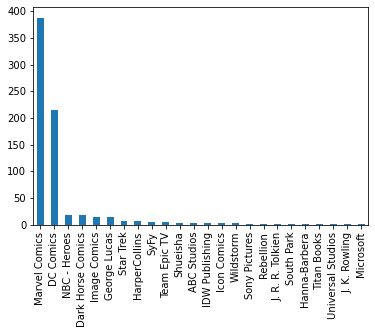

In [14]:
heroes_publisher = pd.value_counts(df_heroes_info['Publisher'])
heroes_publisher.plot(kind='bar')
plt.show()

We can also have different formatting styles for our plots. The different types of formats available are:

In [15]:
styles = plt.style.available
for style in styles:
    print(style)

Solarize_Light2
_classic_test_patch
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn
seaborn-bright
seaborn-colorblind
seaborn-dark
seaborn-dark-palette
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
tableau-colorblind10


To learn more about the different styles available and creating your own style visit <a href="https://matplotlib.org/users/style_sheets.html">here</a>. Let's use the seaborn-talk style for now

In [16]:
plt.style.use('seaborn-talk')

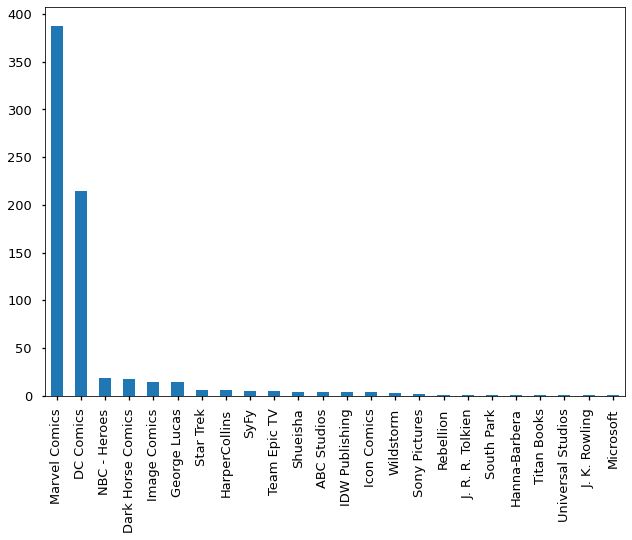

In [17]:
heroes_publisher.plot.bar()
plt.show()

Let us look at the height distribution of our heroes using a histogram.

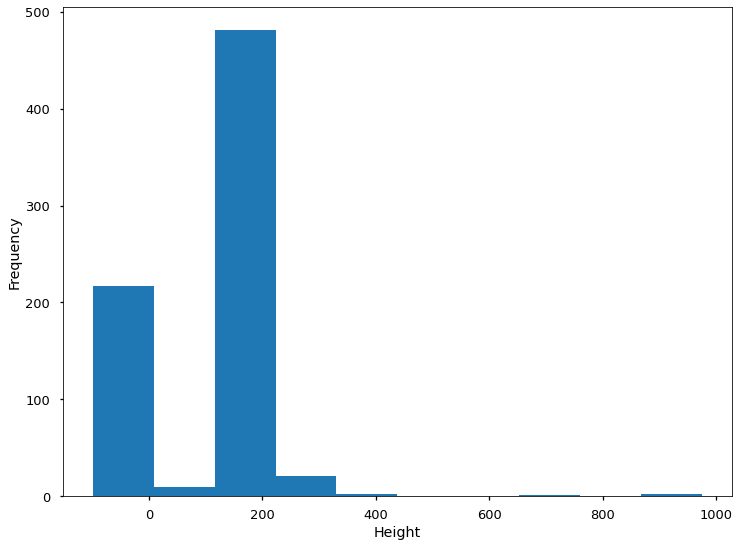

In [18]:
plt.figure(figsize=(12,9))
df_heroes_info['Height'].plot.hist(20)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

Did you notice something odd with this plot? Height cannot be negative! What's happened here is that for all the characters for whom the data is missing their height was initialized as -99. This brings us to our next topic which is missing data.

## Missing Data

Impossible values such as -99 for height or NaN are often used in datasets to fill unknown indexes. The easiest way to resolve this is to remove these indexes.Replotting the histogram without the outliers we have

Text(0.5, 0, 'Height')

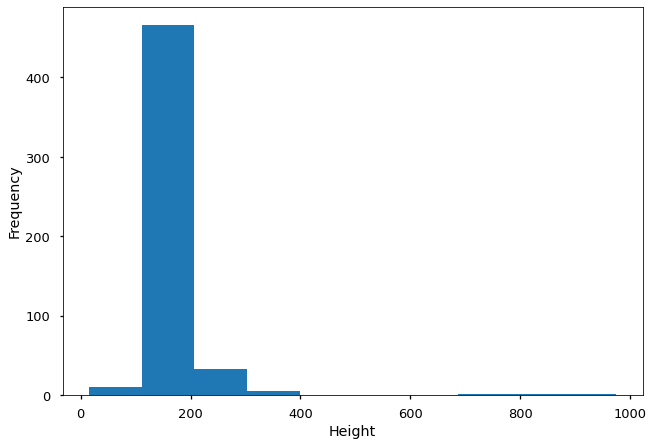

In [19]:
df_heroes_info[df_heroes_info['Height']!=-99]['Height'].plot.hist(20)
plt.xlabel('Height')